In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as spectrogram

# A simple demo of signal denoising
# 信号去噪的简单案例

fs = 500
T = 1.0
t = np.arange(0, T, 1/fs) # Time array 时间向量
f_signal = 5 # frequence of signal 信号频率
noise_power = 0.5 # power of noise 噪声功率
original_signal = np.sin(2*np.pi*f_signal*t)
noise_signal = np.sin(2*np.pi*f_signal*t + noise_power)
noise_signal2 = np.sqrt(noise_power) * np.random.randn(len(noise_signal))

noisy_signal = original_signal + noise_signal2

In [2]:
def rls(x, d, lambda_=0.99, M=32):
    """
    RLS (Recursive Least Squares)
    滤波算法
    
    Parameters:
    参数:
    x : numpy.ndarray
        Input signal (noisy signal).
        输入信号 (含噪信号)
    d : numpy.ndarray
        Desired signal (clean signal).
        期望信号 (不含噪信号)
    lambda_ : float
        Forgetting factor (0 < lambda < 1).
        遗忘因子
    M : int
        Order of the filter (number of coefficients).
        滤波器阶数 (系数)
        
    Returns:
    返回值：
    w : numpy.ndarray
        Final filter coefficients.
        最终滤波器系数
    y : numpy.ndarray
        Filtered output signal.
        滤波器输出信号
    e : numpy.ndarray
        Error signal (difference between desired and filtered output).
        误差信号 (期望输出与实际输出的差值)
    """
    n = len(x)
    w = np.zeros(M)  # Initialize filter coefficients 初始化滤波器系数
    P = np.eye(M) * 1000  # Initialize error covariance matrix 初始化误差协方差矩阵
    y = np.zeros(n)  # Output signal 输出信号
    e = np.zeros(n)  # Error signal 误差信号

    for k in range(M, n):
        x_k = x[k:k-M:-1][::-1]  # Current input signal frame 输入信号分帧
        y[k] = np.dot(w, x_k)  # Calculate filter output 计算滤波器输出
        e[k] = d[k] - y[k]  # Calculate error 计算误差信号

        # Update gain
        # 更新增益
        k_k = P @ x_k / (lambda_ + x_k.T @ P @ x_k)
        w += k_k * e[k]  # Update filter coefficients 更新滤波器系数
        
        # Update error covariance matrix
        # 更新误差协方差矩阵
        P = (P - np.outer(k_k, x_k.T @ P)) / lambda_
        

    return w, y, e

[w,filtered_signal,e] = rls(noisy_signal, original_signal)

In [3]:
def apply_filter(x, w):
    """
    Apply the filter with the given coefficients to the input signal.
    将给定系数的滤波器应用于输入信号
    
    Parameters:
    参数：
    x : numpy.ndarray
        Input signal (the signal to be filtered).
        输入信号 (将要被滤波的信号)
    w : numpy.ndarray
        Filter coefficients (obtained from the RLS algorithm).
        滤波器参数 (由RLS算法得到)
        
    Returns:
    返回值：
    y : numpy.ndarray
        Filtered output signal.
        滤波器输出信号
    """
    M = len(w)  # Filter order (number of coefficients) 滤波器阶数(系数)
    n = len(x)  # Length of input signal 输入信号长度
    y = np.zeros(n)  # Initialize output signal 初始化输出信号

    # Loop through the input signal and apply the filter 输入信号分帧通过滤波器的循环
    for k in range(M - 1, n):
        x_k = x[k - M + 1:k + 1][::-1]  # Current input signal frame (length M) 输入信号分帧
        y[k] = np.dot(w, x_k)  # Calculate filter output 计算滤波器输出

    return y

y = apply_filter(noisy_signal, w)

In [4]:
n = len(original_signal)
freq = np.fft.fftfreq(n, d=1/fs)
fft_value = np.fft.fft(original_signal)
magnitude = np.abs(fft_value)

Text(0.5, 1.0, 'magnitude')

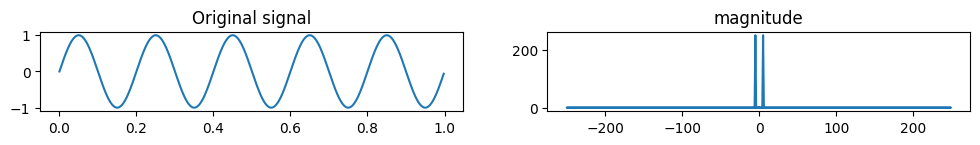

In [5]:
plt.figure(figsize=(12, 6))
plt.subplot(5, 2, 1)
plt.plot(t, original_signal)
plt.title('Original signal')
plt.subplot(5, 2, 2)
plt.plot(freq, magnitude)
plt.title('magnitude')

Text(0.5, 1.0, 'magnitude')

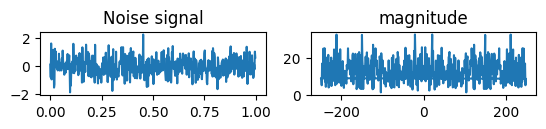

In [6]:
plt.subplot(5, 2, 3)
plt.plot(t,noise_signal2)
plt.title('Noise signal')
plt.subplot(5, 2, 4)
n = len(noise_signal2)
freq = np.fft.fftfreq(n, d=1/fs)
fft_value = np.fft.fft(noise_signal2)
magnitude = np.abs(fft_value)
plt.plot(freq, magnitude)
plt.title('magnitude')

Text(0.5, 1.0, 'magnitude')

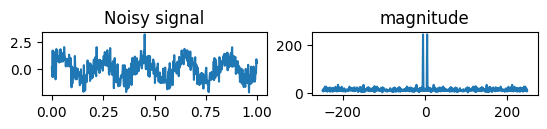

In [7]:
plt.subplot(5, 2, 5)
plt.plot(t,noisy_signal)
plt.title('Noisy signal')
plt.subplot(5, 2, 6)
n = len(noisy_signal)
freq = np.fft.fftfreq(n, d=1/fs)
fft_value = np.fft.fft(noisy_signal)
magnitude = np.abs(fft_value)
plt.plot(freq, magnitude)
plt.title('magnitude')

Text(0.5, 1.0, 'Magnitude')

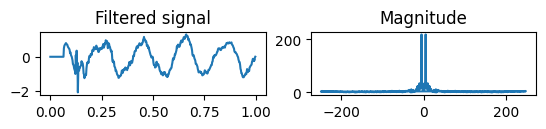

In [8]:
plt.subplot(5, 2, 7)
plt.plot(t,filtered_signal)
plt.title('Filtered signal')
plt.subplot(5, 2, 8)
n = len(filtered_signal)
freq = np.fft.fftfreq(n, d=1/fs)
fft_value = np.fft.fft(filtered_signal)
magnitude = np.abs(fft_value)
plt.plot(freq, magnitude)
plt.title('Magnitude')